# **Stock Market Price Trend Analysis Using LLM and Visualization**
Author: Gouthami Nadupuri

**Introduction**

This project performs exploratory analysis of stock, commodity, and cryptocurrency prices. It uses a lightweight Local Large Language Model (LLM) to automatically generate natural language summaries of price trends for each asset. It also visualizes historical price trends using Matplotlib and Seaborn.

**Key steps include:**

Data cleaning and preparation
Automated trend analysis
Natural language summary generation using GPT-2 model
Visualization of price trends
PDF report generation

**Libraries:** Pandas, Matplotlib, Seaborn, Transformers (GPT-2), FPDF

## Install Required Libraries
This cell installs necessary libraries like `transformers`, `torch`, and `fpdf` for the project.

In [1]:
!pip install transformers torch fpdf

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.3 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4579f4d2a40d168ac11f1d0057d767081811736becd3974c704e77f729f7601e
  Stored in 

##  Import Libraries and Set Styles
Import Python libraries and set the visual style for plots.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from fpdf import FPDF
import os

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

##  Load and Clean the Dataset
Load the stock market dataset, clean column names, and prepare the date column for analysis.

In [3]:
file_path = 'Stock Market Dataset.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

## Identify Price Columns
Identify all columns that represent price values for different assets.

In [4]:
price_columns = [col for col in data.columns if col.endswith('_Price')]
print("Price Columns Found:", price_columns)

Price Columns Found: ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']


## Convert Price Columns to Numeric Format
Ensure that all price values are numeric to allow calculations.

In [5]:
for col in price_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

## Load Local Language Model (GPT-2)
Load the GPT-2 model locally to generate natural language summaries of stock trends.

In [6]:
generator = pipeline("text-generation", model="gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


## Setup the PDF Report Structure
Create a PDF class for adding natural language summaries to the final report.

In [7]:
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Stock and Commodity Price Summary Report', 0, 1, 'C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(2)

    def chapter_body(self, text):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, text)
        self.ln()

## Analyze Each Asset, Create Visualizations, and Generate Summaries
For each asset, generate price trend visualizations and natural language summaries.

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


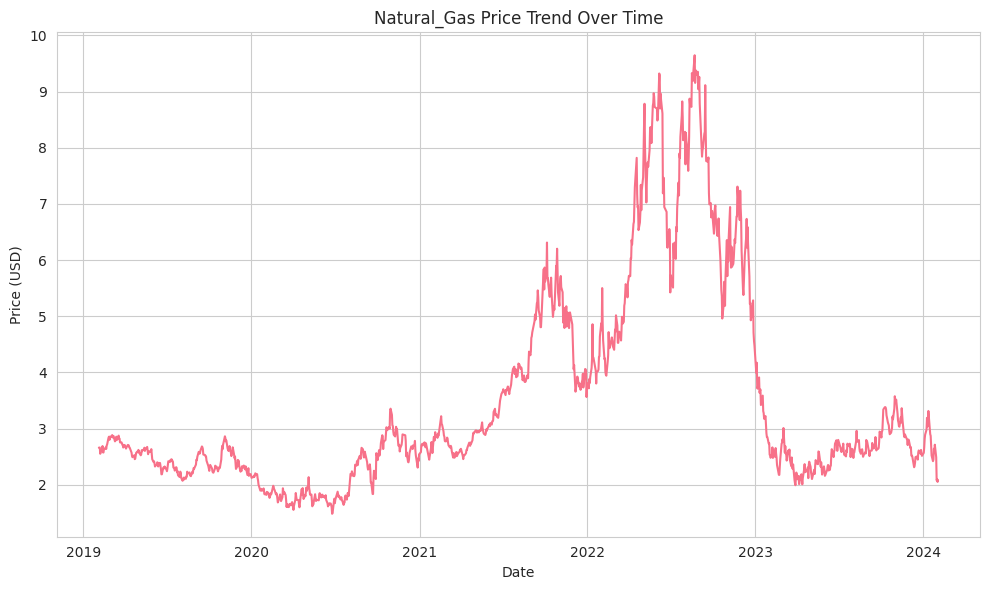

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


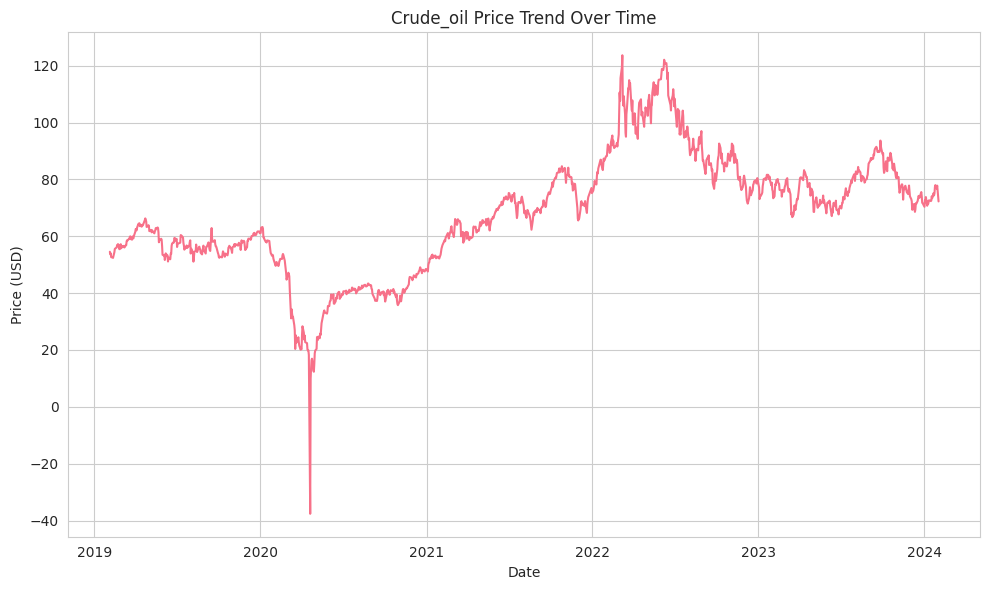

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


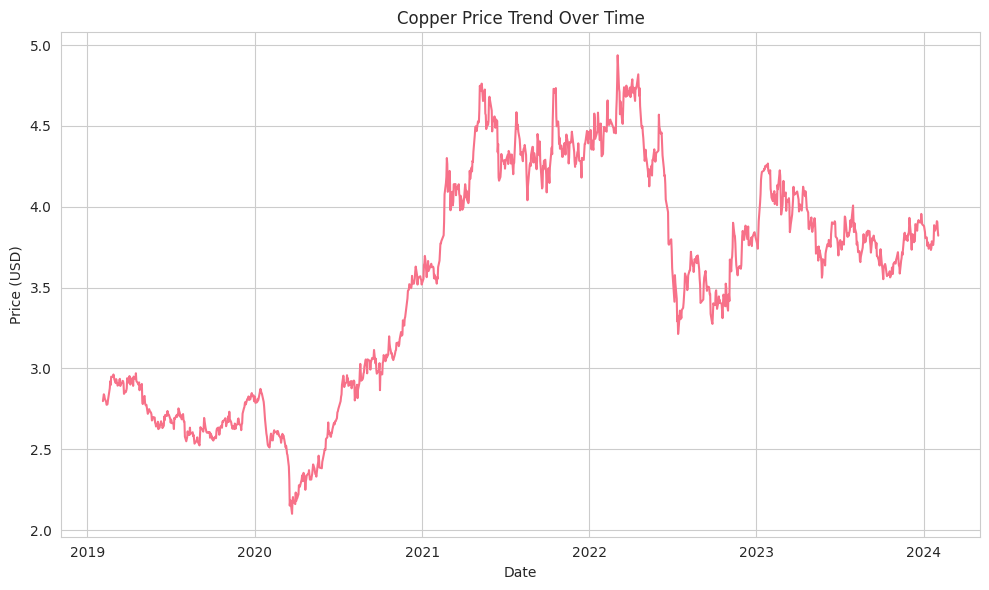

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


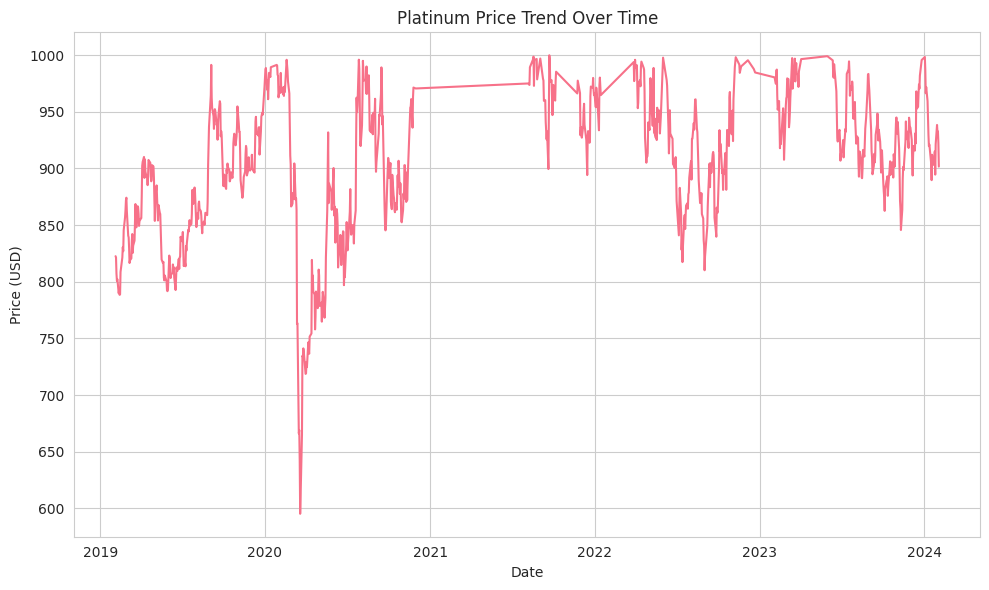

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


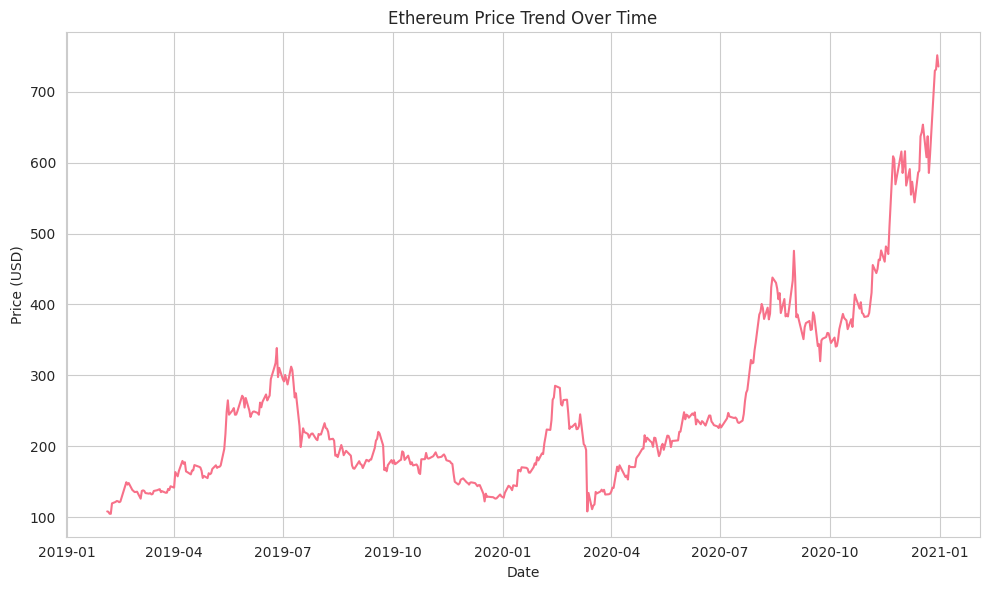

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


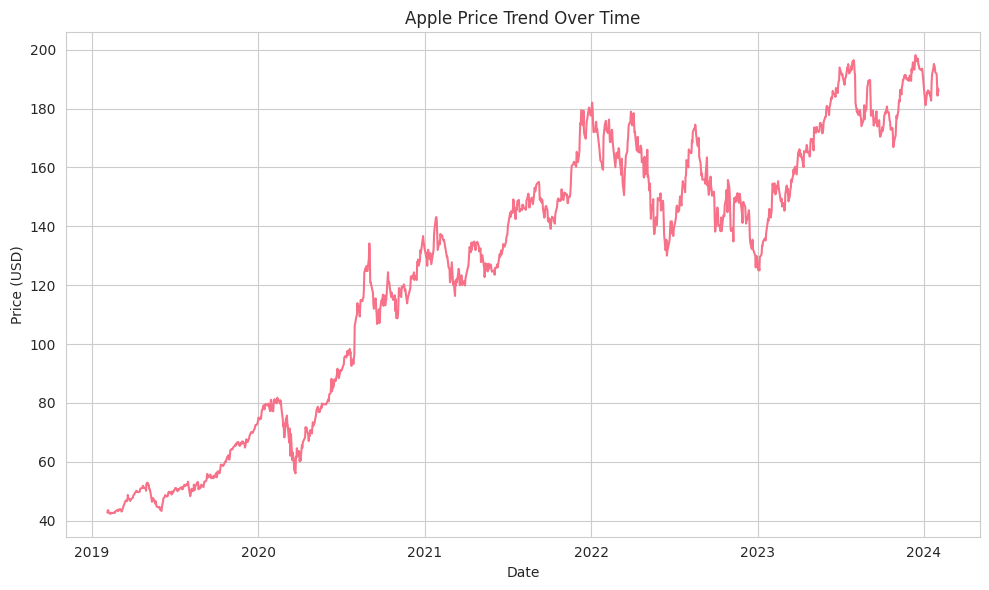

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


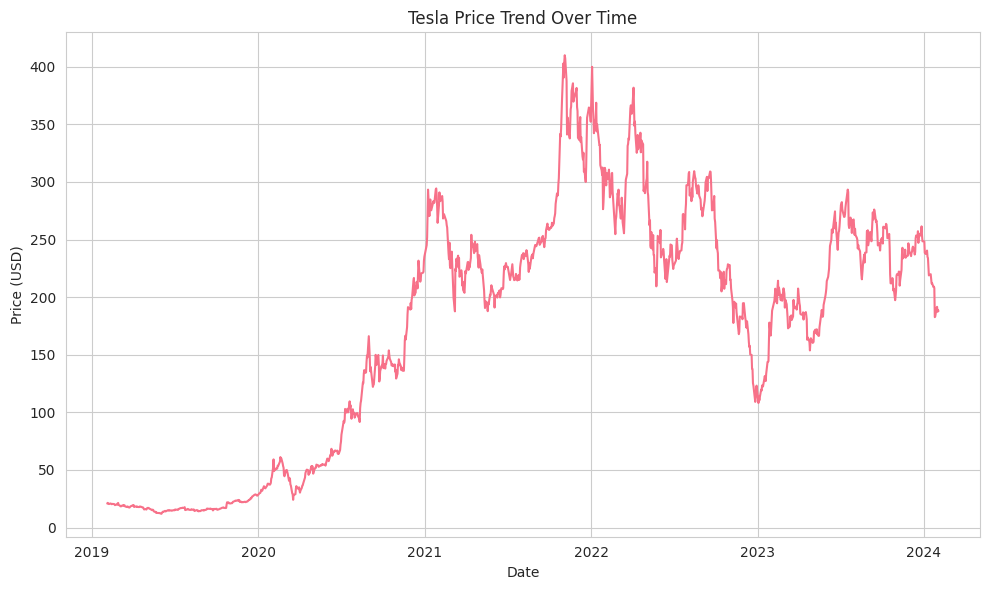

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


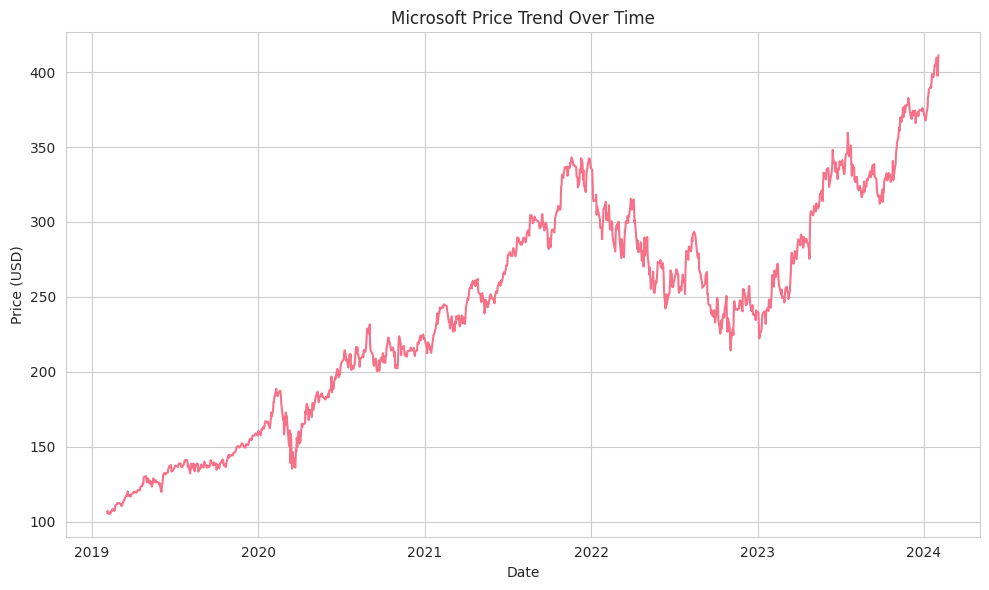

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


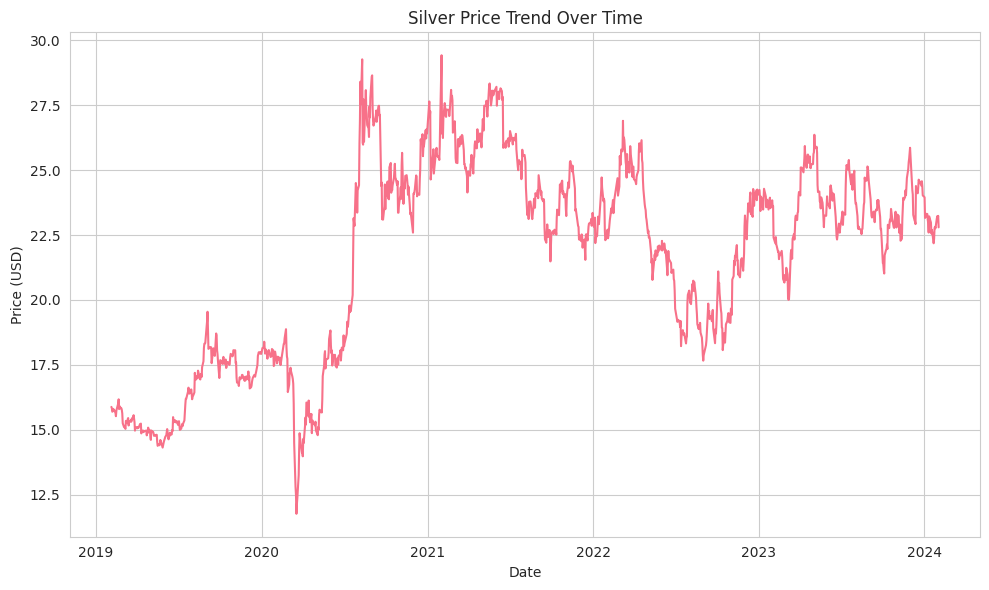

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


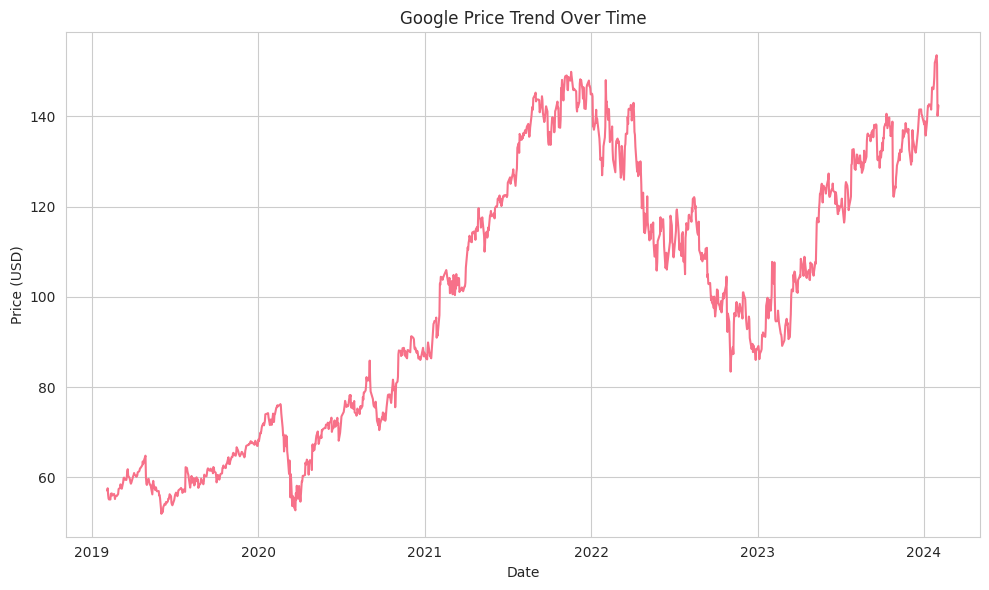

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


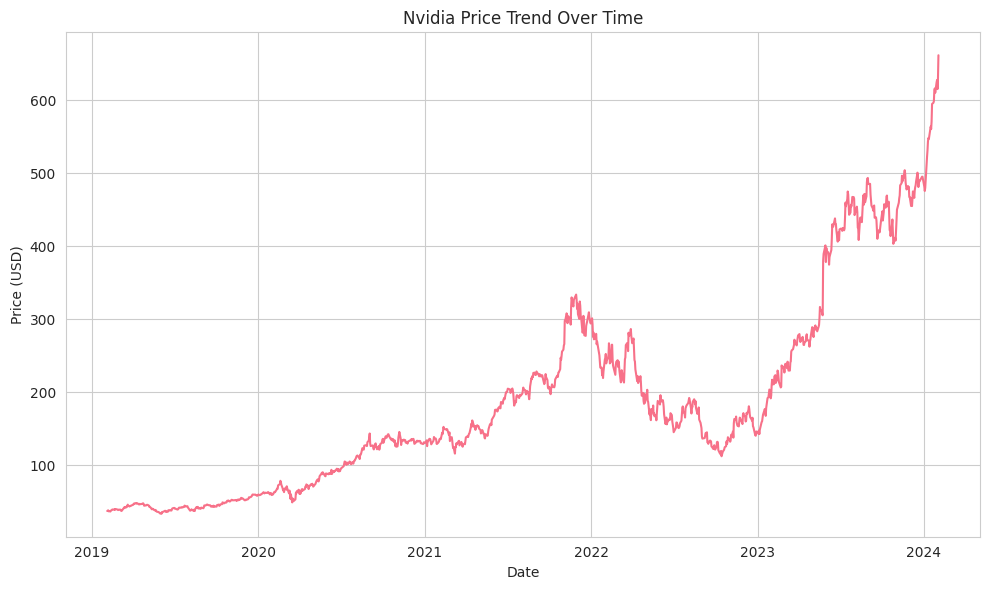

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


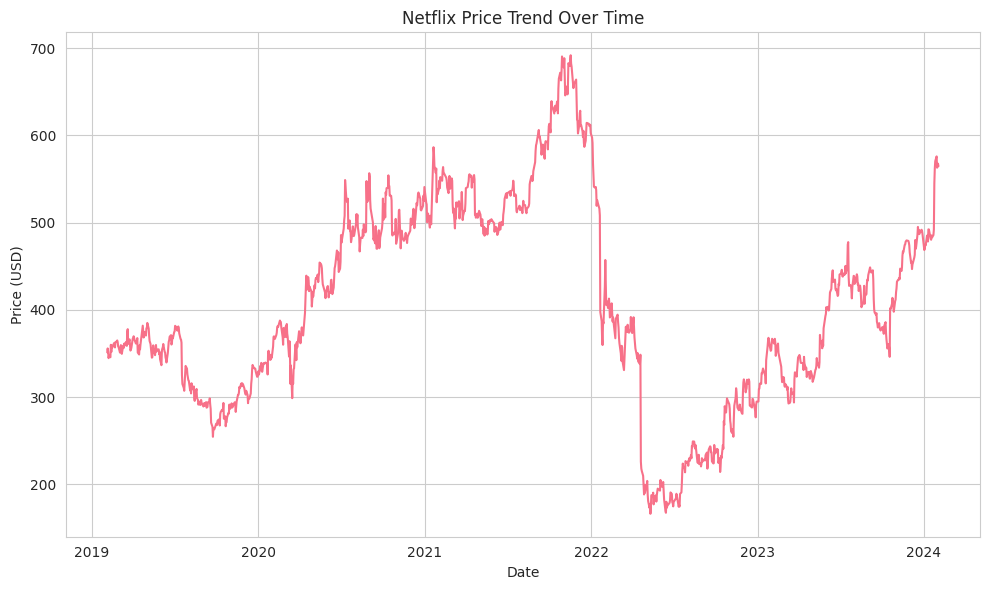

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


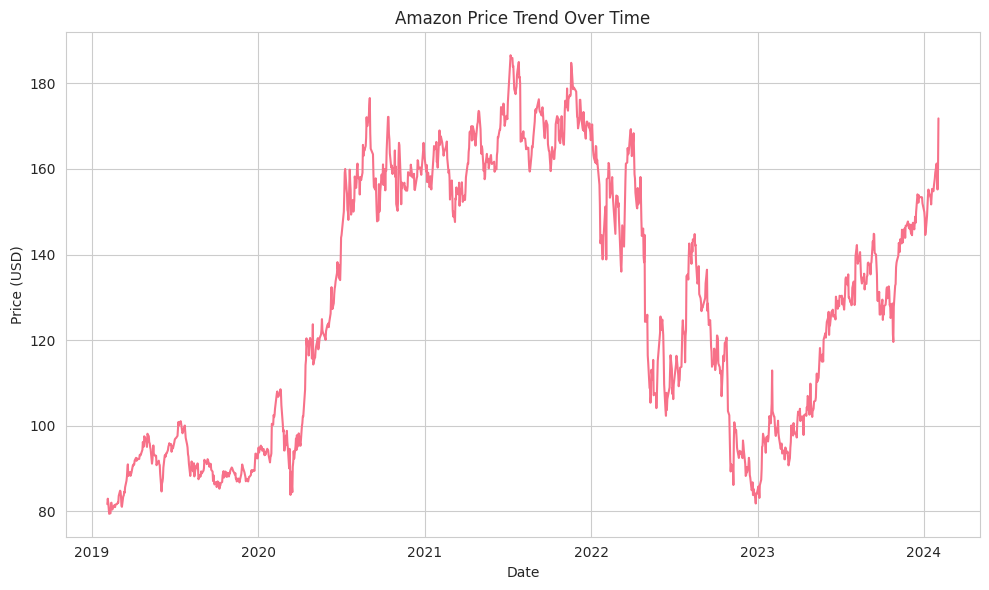

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


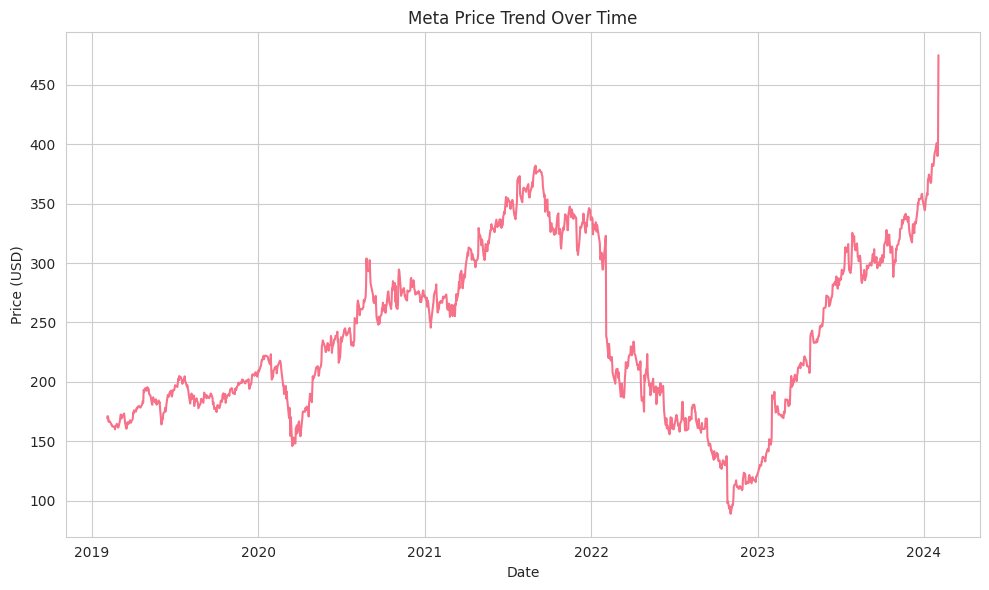

In [8]:
pdf = PDF()
pdf.add_page()
os.makedirs('plots', exist_ok=True)

for price_col in price_columns:
    asset_name = price_col.replace('_Price', '')
    asset_data = data[['Date', price_col]].dropna()

    if asset_data.empty:
        continue

    start_price = asset_data.iloc[0][price_col]
    end_price = asset_data.iloc[-1][price_col]
    percentage_change = ((end_price - start_price) / start_price) * 100
    max_price = asset_data[price_col].max()
    min_price = asset_data[price_col].min()

    summary_text = (f"From {asset_data['Date'].min().date()} to {asset_data['Date'].max().date()}, {asset_name} price started at ${start_price:.2f} and ended at ${end_price:.2f}. "
                    f"The highest price recorded was ${max_price:.2f} and the lowest was ${min_price:.2f}. "
                    f"Overall, the price {'increased' if percentage_change > 0 else 'decreased'} by {abs(percentage_change):.2f}% over this period.")

    prompt = f"Summarize the performance of {asset_name} professionally: {summary_text}"
    generated_text = generator(prompt, max_length=150, num_return_sequences=1)
    enhanced_summary = generated_text[0]['generated_text']

    safe_summary = enhanced_summary.encode('latin-1', 'ignore').decode('latin-1')

    pdf.chapter_title(asset_name)
    pdf.chapter_body(safe_summary)

    plt.figure(figsize=(10,6))
    sns.lineplot(x=asset_data['Date'], y=asset_data[price_col])
    plt.title(f'{asset_name} Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'plots/{asset_name}_trend.png')
    plt.show()

## Save the Final PDF Report
Save the generated summaries into a PDF report.

In [9]:
pdf_file_path = "multi_asset_summary_report.pdf"
pdf.output(pdf_file_path)
print(f" PDF Report '{pdf_file_path}' generated successfully!")

 PDF Report 'multi_asset_summary_report.pdf' generated successfully!
